In [10]:
!python --version

Python 3.11.7


In [11]:
##### Install required libraries (optional)

# Import necessary libraries

import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('./data/disease_with_132_features.csv')
# df.head(5)
# df.shape
df_drop_target = df.drop(['prognosis'],axis =1)
df_drop_target
numerical_columns = np.array(df_drop_target.columns)
len(numerical_columns)


/tmp/ipykernel_3932/4173585162.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


132

In [12]:
# Check for missing values
df.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [13]:
# Check for duplicated rows
df.duplicated().sum()

# Drop duplicate rows
df = df.drop_duplicates()
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,continuous_sneezing.1,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo
403,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo
405,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Impetigo
406,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,Impetigo


In [14]:

from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(df, test_size = 0.26, random_state = 42)

# Save the training and testing sets to CSV files
train_data.to_csv('../artifacts/train.csv', index = False, header = True)
test_data.to_csv('../artifacts/test.csv', index = False, header = True)

# print(train_data)
print("Ingestion of the data is completed")



Ingestion of the data is completed


In [15]:
# from google.colab import drive
# drive.mount('/content/drive')

In [16]:
#Data trasformation

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler



In [17]:
# Define pipelines for numerical and categorical data preprocessing

num_pipeline = Pipeline(
                steps=[
                    ("imputer", SimpleImputer(strategy="median")),
                    ("scalar", StandardScaler(with_mean=False))
                ]
            )

# Create a preprocessor that applies transformations to numerical and categorical columns

preprocessor = ColumnTransformer(
                transformers=[
                    ('num_pipeline', num_pipeline, numerical_columns),
                ]
            )


In [18]:
# Load the training and testing datasets

train_df = pd.read_csv('../artifacts/train.csv')
test_df = pd.read_csv('../artifacts/test.csv')

# Define the target column and numerical columns
target_column_name = 'prognosis'

# Separate input and target features for training and testing datasets
input_feature_train_df = train_df.drop(columns=[target_column_name], axis=1)
target_feature_train_df = train_df[[target_column_name]]

input_feature_test_df = test_df.drop(columns=[target_column_name], axis=1)
target_feature_test_df = test_df[[target_column_name]]

# input_feature_train_df
# Apply one-hot encoding to the target feature
# one = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

# output_feature_train_df = one.fit_transform(target_feature_train_df)
# output_feature_test_df = one.transform(target_feature_test_df)

# Decoding the disease column
# diseases = np.array([column for column in  output_feature_train_df.columns])
# diseases


In [19]:
# Apply preprocessing to input features
# print(np.array(input_feature_train_df)[0])
# input_feature_train_arr = preprocessor.fit_transform(input_feature_train_df)
# input_feature_test_arr = preprocessor.transform(input_feature_test_df)
# print(input_feature_train_arr[0])

# input_feature_train_arr

# from sklearn.decomposition import PCA
# pca = PCA(n_components = 5)
# data_scaled_pca = pca.fit_transform(input_feature_train_df)
# data_scaled_pca




In [20]:
# !pip install dill
# # Save the preprocessor object to a file
# import dill

# with open('./artifacts/preprocessor_v2.pkl', "wb") as file_obj:
#         dill.dump(preprocessor, file_obj)


In [21]:
# Prepare training and testing data
X_train,y_train,X_test,y_test = (
    input_feature_train_df,
    target_feature_train_df,
    input_feature_test_df,
    target_feature_test_df
)

print("Saved preprocesssing object.")
# X_train[0]
# y_train[0]

Saved preprocesssing object.


In [22]:
# Evaluate the performance of regression models by iterating through all the models
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import r2_score

def evaluate_models(X_train, y_train, X_test, y_test, models):
    report = {}

    for i in range(len(list(models))):
        model = list(models.values())[i]

        model.fit(X_train,y_train)

        # y_train_pred = model.predict(X_train)

        y_test_pred = model.predict(X_test)
        # print(X_test)
        # break

        # test_model_score = r2_score(y_test, y_test_pred)

        report[list(models.keys())[i]] = {
            # "Confusion matrix": confusion_matrix(y_test, y_test_pred),
            "Recall": recall_score(y_test, y_test_pred, average="macro"),  # Corrected for multiclass
            "Precision": precision_score(y_test, y_test_pred, average="macro"),  # Corrected for multiclass
            "Accuracy": accuracy_score(y_test, y_test_pred),
            "Fbeta": fbeta_score(y_test, y_test_pred, beta=1, average="macro"),  # Corrected for multiclass
        }

    return report

In [23]:

from sklearn.ensemble import (
    RandomForestClassifier,  # For classification tasks
    GradientBoostingClassifier,  # For classification tasks
    AdaBoostClassifier  # For classification tasks
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier  # For classification tasks
from sklearn.svm import SVC

# ... Your model training and evaluation code using these classifiers ...

# Define a dictionary of regression models to evaluate

models = {
        "Random Forest" : RandomForestClassifier(),
        "svm" : SVC(kernel="rbf"),
        "K-Neighbors" : KNeighborsClassifier(),
        "Decision Tree" : DecisionTreeClassifier(),
        "AdaBoost" : AdaBoostClassifier(),
        # "XGBRegressor Classifier" : XGBClassifier()
}




model_report:dict = evaluate_models(
    X_train = X_train,
    y_train = y_train,
    X_test = X_test,
    y_test = y_test,
    models = models
)

# model_report
X_test



/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defin

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,continuous_sneezing.1,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


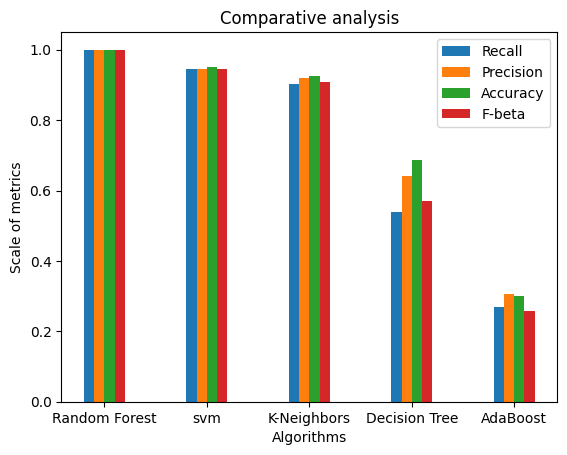

In [24]:
import numpy as np
import matplotlib.pyplot as plt

X = list(model_report.keys())
# Ygirls = [model_report[x] for x in X]
# Ygirls

recall = [model_report[x]['Recall'] for x in X]
precision = [model_report[x]['Precision'] for x in X]
accuracy = [model_report[x]['Accuracy'] for x in X]
fbeta = [model_report[x]['Fbeta'] for x in X]



X_axis = np.arange(len(X))
width = 0.1  # Adjust bar width as needed

plt.bar(X_axis - 1.5 * width, recall, width, label='Recall')
plt.bar(X_axis - 0.5 * width, precision, width, label='Precision')
plt.bar(X_axis + 0.5 * width, accuracy, width, label='Accuracy')
plt.bar(X_axis + 1.5 * width, fbeta, width, label='F-beta')

plt.xticks(X_axis, X)
plt.xlabel("Algorithms")
plt.ylabel("Scale of metrics")
plt.title("Comparative analysis")
plt.legend()
plt.show()

In [27]:
import operator
import dill

# Define the dictionary of models and their metrics
models_list = {
    'Random Forest': {'Recall': 1.0, 'Precision': 1.0, 'Accuracy': 1.0, 'Fbeta': 1.0},
    'svm': {'Recall': 0.9459459459459459, 'Precision': 0.9459459459459459, 'Accuracy': 0.95, 'Fbeta': 0.9459459459459459},
    'K-Neighbors': {'Recall': 0.9035087719298245, 'Precision': 0.9210526315789473, 'Accuracy': 0.925, 'Fbeta': 0.9078947368421053},
    'Decision Tree': {'Recall': 0.5325, 'Precision': 0.5866666666666667, 'Accuracy': 0.7125, 'Fbeta': 0.5328968253968254},
    'AdaBoost': {'Recall': 0.29398148148148145, 'Precision': 0.26436047849091326, 'Accuracy': 0.325, 'Fbeta': 0.25104975796465157}
}

# Define a function to calculate the average metric score for a model
def calculate_average_score(model_metrics):
    total_score = 0
    for metric, score in model_metrics.items():
        total_score += score
    return total_score / len(model_metrics)

# Calculate the average score for each model
average_scores = {model: calculate_average_score(metrics) for model, metrics in models_list.items()}

# Sort the models by their average score in descending order
sorted_models = sorted(average_scores.items(), key=operator.itemgetter(1), reverse=True)
sorted_models

# # Select the top 3 models
top_3_models = sorted_models[:3]
top_3_models

# # Print the top 3 models and their average scores
# print("Top 3 models based on average score:")
for model, score in top_3_models:
    with open('../artifacts/{}_v2.pkl'.format(model), "wb") as file_obj:
        dill.dump(models[model], file_obj)
        # print(models[model])

# models[model]


In [28]:
# Save the best model to a file
# !pip3 install dill

import dill

best_model_name = max(model_report, key=lambda model: max(model_report[model].values()))
best_model = models[best_model_name]

with open('../artifacts/best_model_v2.pkl', "wb") as file_obj:
        dill.dump(best_model, file_obj)

In [45]:
import dill

arr = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]]

# Load the best model from the file
with open('../artifacts/best_model_v2.pkl', "rb") as file_obj:
    loaded_model = dill.load(file_obj)
    predict = loaded_model.predict(arr)
    print(predict)
    

with open('../artifacts/K-Neighbors_v2.pkl', "rb") as file_obj:
    loaded_model = dill.load(file_obj)
    predict = loaded_model.predict(arr)
    print(predict)

with open('../artifacts/svm_v2.pkl', "rb") as file_obj:
    loaded_model = dill.load(file_obj)
    predict = loaded_model.predict(arr)
    print(predict)

type(loaded_model)
# # Now you can use 'loaded_model' for making predictions



# loaded_model
# predict

# # len(arr[0])

['Pneumonia']
['AIDS']
['AIDS']


/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


sklearn.svm._classes.SVC

In [42]:
for model, score in top_3_models:
    with open('../artifacts/{}_v2.pkl'.format(model), "rb") as file_obj:
        loaded_model = dill.load(file_obj)
        loaded_model
        # predict = loaded_model.predict(arr)
        # print(loaded_model)
        

EOFError: Ran out of input

In [43]:
import os

for model, score in top_3_models:
    file_path = '../artifacts/{}_v2.pkl'.format(model)
    if os.path.isfile(file_path):
        with open(file_path, "rb") as file_obj:
            loaded_model = dill.load(file_obj)
            # Further processing with loaded_model
            print(loaded_model)
    else:
        print("File not found: {}".format(file_path))


EOFError: Ran out of input